In [1]:
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
from tqdm.notebook import tqdm, trange
from update import test_inference

from mnist_loader import get_dataset
from mnist_model import CNNMnist

In [2]:
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
NUM_USERS = 100
EPOCHS = 10

# Train

CNNMnist(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)


  0%|          | 0/10 [00:00<?, ?it/s]

0it [00:00, ?it/s]


Train loss: 0.9239082680518693


0it [00:00, ?it/s]


Train loss: 0.4084737397142565


0it [00:00, ?it/s]


Train loss: 0.3154455329388825


0it [00:00, ?it/s]


Train loss: 0.2744692071064957


0it [00:00, ?it/s]


Train loss: 0.24122556634962178


0it [00:00, ?it/s]


Train loss: 0.22546750205809246


0it [00:00, ?it/s]


Train loss: 0.2116040105361547


0it [00:00, ?it/s]


Train loss: 0.20045761654435446


0it [00:00, ?it/s]


Train loss: 0.18946869951337258


0it [00:00, ?it/s]


Train loss: 0.18208470589705686


FileNotFoundError: [Errno 2] No such file or directory: 'images/nn_mnist_cnn_10.png'

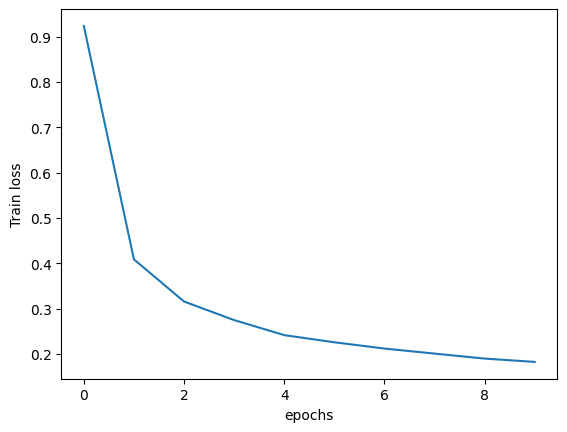

In [3]:
# load datasets
train_dataset, test_dataset, _ = get_dataset(NUM_USERS, True)

global_model = CNNMnist()

# Set the model to train and send it to device.
global_model.to(DEVICE)
global_model.train()
print(global_model)

# Training
# Set optimizer and criterion
optimizer = torch.optim.SGD(global_model.parameters(), lr=0.01, momentum=0.5)

trainloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
criterion = torch.nn.NLLLoss().to(DEVICE)
epoch_loss = []

for epoch in trange(EPOCHS):
    batch_loss = []

    for batch_idx, (images, labels) in tqdm(enumerate(trainloader), leave=False):
        images, labels = images.to(DEVICE), labels.to(DEVICE)

        optimizer.zero_grad()
        outputs = global_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        batch_loss.append(loss.item())

    loss_avg = sum(batch_loss) / len(batch_loss)
    print('\nTrain loss:', loss_avg)
    epoch_loss.append(loss_avg)

# Plot loss
plt.figure()
plt.plot(range(len(epoch_loss)), epoch_loss)
plt.xlabel('epochs')
plt.ylabel('Train loss')
plt.savefig(f'images/nn_mnist_cnn_{EPOCHS}.png')

# Test

In [7]:
test_acc, test_loss = test_inference(DEVICE, global_model, test_dataset)
print(f'Test on {len(test_dataset)} samples')
print(f'Test Accuracy: {100 * test_acc:.2f}%')

Test on 10000 samples
Test Accuracy: 98.42%
